## **Mount the Google Drive folder to notebook:**
- Run the below cell
- Click the URL
- Log in with your Google account
- Copy the authorization code 
- Paste into the text box

In [ ]:
# Connect notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **Navigate to the shared drive folder.**
*NOTE: Before you do that, make sure you have added the folder to your drive. To do this, make sure you are logged into the same Google account which was used to log in in the above cell. Go to the Google Drive folder and click the drop down menu next to 'Cardiac Pathway Collections of Reactome' at the top, then click 'Add Shortcut to Drive'. Make sure you add the short cut to 'My Drive'. Then the rest of the notebook should run just fine. If these instructions aren't clear, please see the below picture.*

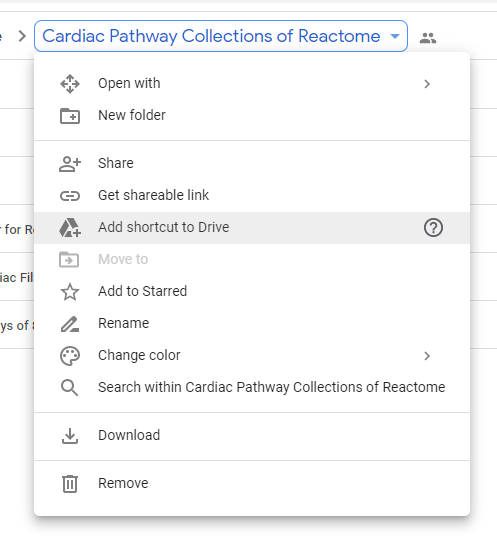

In [ ]:
# Navigate to the shared drive folder
%cd /content/drive/'My Drive'/'Pig Proteomics Summer Project'
!pwd
!ls

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project
/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project
'2021-06-21 Introduction to Proteomes.ipynb'
'2021-06-28 Reactome and Uniprot.ipynb'
'2021-06-29 Identifying characteristics of an unreliable protein.gslides'
 data
 gene_PE.ipynb
 histogram.ipynb
 output
 pe_scores.ipynb
 scratch
'Summer Project.gdoc'
'Week 1 Introduction slides.gslides'


## Reactome

Biological pathways and processes can be modeled as a set of proteins and small molecules which serve a specific function. One resource which does as such is called the Reactome Pathway Database <https://reactome.org/>. Please familiarize yourself with the website. I can give you a tour at our next meeting or whenever we have a chance. For now we will be working with the data from Reactome, which can be available for download here: https://reactome.org/download-data

Relevant data sources:
- https://reactome.org/download/current/UniProt2Reactome_All_Levels.txt 
- https://reactome.org/download/current/ReactomePathways.txt

The first file represents the mapping file from proteins to pathway identifiers. In the first column we have the uniprot accession for the protein and in the second column we have the pathway identifier represented in the format 'R-XXX-XXXXX'. The key takeaway is that the 'XXX' indicates the organism the pathway takes place in and the remaining digits represent the specific pathway. 

The second file represents the mapping of pathway identifiers to the pathway name. The first column are pathway identifiers and the second pathway is the pathway name. 

Here are a few questions to guide your tasks for this notebook: 

1. What is the 'XXX' key is for Sus scrofa pathways?
2. How many pathways are there for Sus scrofa?
3. How many proteins map to pathways for Sus scrofa?
4. How many of these proteins are found in the Uniprot database you worked on last week? How many of these are in Swiss-Prot and how many of these are in TrEMBL?

The ultimate task for this notebook is to create and fill in a table with headers as: ['Pathway ID', 'Pathway Name', 'Number of proteins', 'Number of proteins in Uniprot', 'Number of proteins in Swiss-prot', 'Number of proteins in TrEMBL']

'XXX' key for Sus scrofa: 'SSC'


In [ ]:
# download the appropriate files and move them into the data folder
#download uniprot2reactome_all_levels.txt
! wget https://reactome.org/download/current/UniProt2Reactome_All_Levels.txt

--2021-06-28 17:52:07--  https://reactome.org/download/current/UniProt2Reactome_All_Levels.txt
Resolving reactome.org (reactome.org)... 100.25.71.177
Connecting to reactome.org (reactome.org)|100.25.71.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102290042 (98M) [text/plain]
Saving to: ‘UniProt2Reactome_All_Levels.txt’

UniProt2Reactome_Al 100%[===================>]  97.55M  56.1MB/s    in 1.7s    

2021-06-28 17:52:08 (56.1 MB/s) - ‘UniProt2Reactome_All_Levels.txt’ saved [102290042/102290042]



In [ ]:
#download reactomepathways.txt file
!wget https://reactome.org/download/current/ReactomePathways.txt

--2021-06-28 17:52:35--  https://reactome.org/download/current/ReactomePathways.txt
Resolving reactome.org (reactome.org)... 100.25.71.177
Connecting to reactome.org (reactome.org)|100.25.71.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1420625 (1.4M) [text/plain]
Saving to: ‘ReactomePathways.txt’

ReactomePathways.tx 100%[===================>]   1.35M  --.-KB/s    in 0.05s   

2021-06-28 17:52:35 (25.6 MB/s) - ‘ReactomePathways.txt’ saved [1420625/1420625]



In [ ]:
#move UnitProt2Reactome_All_Levels.txt and ReactomePathways.txt to data file
!mv UniProt2Reactome_All_Levels.txt ./data/reactome_uniprot/

In [ ]:
!mv ReactomePathways.txt ./data/reactome_uniprot/

In [ ]:
import pandas as pd

def parse_protein_to_pathway(file_name, species_tag = 'Sus scrofa'):
    """
    function parses file from Reactome and returns dict mapping pathway to a set of
    proteins. species_tag is set to 'SSC' by default and only returns pathway IDs
    with this tag
    """
    pathway_to_proteins = {}
    
    lines = [l.strip("\n") for l in open(file_name,'r').readlines()]
    
    for l in lines:
        indice = []
        
        if species_tag in l:
            for k in range(len(l)):
                t = l[k:k+1]
                if t == '\t':
                    indice.append(k)
            
            if l[indice[0]+1:indice[1]] in pathway_to_proteins.keys():
                pathway_to_proteins[l[indice[0]+1:indice[1]]].append(l[0:indice[0]])
            else:
                pathway_to_proteins[l[indice[0]+1:indice[1]]] = [l[0:indice[0]]]
    
    for key in pathway_to_proteins.keys():
        pathway_to_proteins[key] = set(pathway_to_proteins[key])
    
    return pathway_to_proteins

def parse_pathway_id_to_name(file_name, species_tag='Sus scrofa'):
    """
    function parses file from Reactome and returns dict mapping pathway ID to the pathway
    name. species_tag is set to 'SSC' by default and only returns pathway IDs with this tag
    """
    pathway_to_name = {}
    
    lines = [l.strip("\n") for l in open(file_name,'r').readlines()]
    for l in lines:
        indice = []
        
        if species_tag in l:
            for k in range(len(l)):
                t = l[k:k+1]
                if t == '\t':
                    indice.append(k)

            pathwayID = l[indice[0]+1:indice[1]]
            pathwayName = l[indice[2]+1:indice[3]]

            if pathwayID in pathway_to_name.keys():
              pass
            else:
              pathway_to_name[pathwayID] = pathwayName
    
    return pathway_to_name

def create_pathway_to_protein_table(file_name, uniprot_table, species_tag = 'Sus scrofa'):
    """
    combines previous data from Uniprot and Reactome to create summary table
    file_name -> from reactome
    uniprot_table -> has headers: [sptr, accession, organism, GN, length] (file name for testing purposes: pigFASTA.csv)
    
    Pathway ID | Name | #Proteins | #Proteins in UniProt | #SP | #Tr
    ------------------------------------------------------------------
    """
    pathway_to_proteins = parse_protein_to_pathway(file_name, species_tag)
    pathway_to_name = parse_pathway_id_to_name(file_name, species_tag)
    protein_uniprot = set(list(uniprot_table['accession']))

    pathwayID = []
    names = []
    proteinTotal = []
    proteinUniprot = []
    protein_sp = []
    protein_tr = []

    for key in pathway_to_name.keys():
      sp_dummy = []
      tr_dummy = []

      proteins_in_uniprot = protein_uniprot.intersection(pathway_to_proteins[key])
      pathwayID.append(key)
      names.append(pathway_to_name[key])
      proteinTotal.append(len(pathway_to_proteins[key]))
      proteinUniprot.append(len(proteins_in_uniprot))

      for k in list(proteins_in_uniprot):
        sp_tr = uniprot_table.loc[uniprot_table['accession'] == k, 'sptr'].iloc[0]
        if sp_tr == 'sp':
          sp_dummy.append(k)
        elif sp_tr == 'tr':
          tr_dummy.append(k)
        
      protein_sp.append(len(sp_dummy))
      protein_tr.append(len(tr_dummy))



    header = ['Pathway ID', 
              'Pathway Name', 
              'Number of proteins', 
              'Number of proteins in Uniprot', 
              'Number of proteins in Swiss-prot',
              'Number of proteins in TrEMBL']

    data = {'Pathway ID' : pathwayID, 'Pathway Name' : names, 'Number of Proteins' : proteinTotal, 
            'Number of Proteins in Uniprot' : proteinUniprot, 'Number of proteins in Swiss-prot' : protein_sp,
            'Number of proteins in TrEMBL' : protein_tr}

    df = pd.DataFrame(data)

    return df

In [ ]:
%cd output/uniprot

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project/output/uniprot


In [ ]:
! ls

all_fasta.csv  group_final.csv	human_mouse.csv  mouseFASTA.csv  pigFASTA.csv
group_df.csv   humanFASTA.csv	human_pig.csv	 mouse_pig.csv


In [ ]:
sus_scrofa_data = pd.read_csv('pigFASTA.csv')

In [ ]:
sus_scrofa_data

,Unnamed: 0,sptr,accession,organism,GN,length
0,0,sp,Q52NJ3,Sus scrofa,SAR1A,198
1,1,sp,Q6PKU1,Sus scrofa,SPI1,270
2,2,sp,P80928,Sus scrofa,MIF,115
3,3,sp,D5K8A2,Sus scrofa,SPATA18,560
4,4,sp,Q2HYU2,Sus scrofa,PFKM,780
...,...,...,...,...,...,...
49787,49787,tr,A0A287B7R5,Sus scrofa,MEX3B,576
49788,49788,tr,I3LQB3,Sus scrofa,ATP6V1H,465
49789,49789,tr,K7GNX3,Sus scrofa,SLC25A14,344
49790,49790,tr,A0A287AKI0,Sus scrofa,BCLAF1,921


In [ ]:
%cd -

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project


In [ ]:
%cd data/reactome_uniprot

/content/drive/.shortcut-targets-by-id/1H3M9nQYJ9K9M22jDv-wcvZ0azPz9lhsr/Pig Proteomics Summer Project/data/reactome_uniprot


In [ ]:
file_name = 'UniProt2Reactome_All_Levels.txt'
pathway_to_name = parse_pathway_id_to_name(file_name)

In [ ]:
pathway_to_protein = parse_protein_to_pathway(file_name)

In [ ]:
pathway_protein_table = create_pathway_to_protein_table(file_name, sus_scrofa_data)

In [ ]:
pathway_protein_table

,Pathway ID,Pathway Name,Number of Proteins,Number of Proteins in Uniprot,Number of proteins in Swiss-prot,Number of proteins in TrEMBL
0,R-SSC-109582,Hemostasis,463,463,24,439
1,R-SSC-1280218,Adaptive Immune System,657,657,28,629
2,R-SSC-168249,Innate Immune System,794,794,60,734
3,R-SSC-168256,Immune System,1384,1384,81,1303
4,R-SSC-198933,Immunoregulatory interactions between a Lympho...,133,133,7,126
...,...,...,...,...,...,...
1584,R-SSC-5661231,Metallothioneins bind metals,1,1,1,0
1585,R-SSC-1059683,Interleukin-6 signaling,1,1,1,0
1586,R-SSC-380612,Metabolism of serotonin,1,1,1,0
1587,R-SSC-1606341,IRF3 mediated activation of type 1 IFN,1,1,1,0


In [ ]:
def missing_protein(pathway_table):
  """
  function outputs the pathway IDs of the pathway_protein_table where the number of proteins in the reactome =/= number of proteins in Uniprot
  """
  
  header = ['Pathway ID', 'Pathway Name', 'Number of Proteins', 'Number of Proteins in Uniprot',
          'Number of proteins in Swiss-prot', 'Number of proteins in TrEMBL']

  df2 = pd.DataFrame(columns = header)
  df2 = df2.append(pathway_table[pathway_table['Number of Proteins'] != pathway_table['Number of Proteins in Uniprot']])

  return df2


In [ ]:
#test to see if there are any missing Reactome proteins from the Uniprot db
missing_df = missing_protein(pathway_protein_table)
missing_df

,Pathway ID,Pathway Name,Number of Proteins,Number of Proteins in Uniprot,Number of proteins in Swiss-prot,Number of proteins in TrEMBL


In [ ]:
#test 2 to see if there are any missing Reactome proteins from the Uniprot db
list(pathway_protein_table['Number of Proteins']) == list(pathway_protein_table['Number of Proteins in Uniprot'])

True

Therefore, all the Uniprot proteins belonging to Sus scrofa also belong in the Reactome database for SSC

In [ ]:
def set_of_proteins(file_name, species_tag = 'Sus scrofa'):
  pathway_protein = parse_protein_to_pathway(file_name, species_tag)
  set_protein = set()

  for key in pathway_protein.keys():
    set_protein = set_protein.union(pathway_protein[key])
  
  return set_protein


In [ ]:
set_reactome_proteins = set_of_proteins(file_name)
print("Number of unique proteins in Reactome from Sus scrofa: ", len(set_reactome_proteins))

Number of unique proteins in Reactome from Sus scrofa:  8075


In [ ]:
set_uniprot_proteins = set(sus_scrofa_data['accession'])
print("Number of unique proteins in Uniprot from Sus scrofa: ", len(set_uniprot_proteins))

Number of unique proteins in Uniprot from Sus scrofa:  49792


In [ ]:
print("Number of Sus scrofa proteins which are not found in any SSC Reactome pathway: ", len(set_uniprot_proteins) - len(set_reactome_proteins))

Number of Sus scrofa proteins which are not found in any SSC Reactome pathway:  41717


If you finish early and still want some tasks to do, you can take a look at the Application Programming Interface (API) for accessing Uniprot database programmatically and give it a try. This can be very useful to retrieve additional data about a protein that is not found in the downloaded fasta file from last week. https://www.uniprot.org/help/programmatic_access

For example, if you take a look at a Uniprot website for a protein ACE2 (https://www.uniprot.org/uniprot/Q9BYF1) you can see information about its function, subcellular localization, pathology, expression, protein structure, among other information. These information are not reflected in the fasta file we looked at last week. These additional information may be useful in the future for other steps of this project. 

In [ ]:
pathway_protein_table

,Pathway ID,Pathway Name,Number of Proteins,Number of Proteins in Uniprot,Number of proteins in Swiss-prot,Number of proteins in TrEMBL
0,R-SSC-109582,Hemostasis,463,463,24,439
1,R-SSC-1280218,Adaptive Immune System,657,657,28,629
2,R-SSC-168249,Innate Immune System,794,794,60,734
3,R-SSC-168256,Immune System,1384,1384,81,1303
4,R-SSC-198933,Immunoregulatory interactions between a Lympho...,133,133,7,126
...,...,...,...,...,...,...
1584,R-SSC-5661231,Metallothioneins bind metals,1,1,1,0
1585,R-SSC-1059683,Interleukin-6 signaling,1,1,1,0
1586,R-SSC-380612,Metabolism of serotonin,1,1,1,0
1587,R-SSC-1606341,IRF3 mediated activation of type 1 IFN,1,1,1,0
